# 데이터 사이언스 과정_210723

#### value_count() 먼저 확인 후 -> Null값 중복 안 되는 값으로 대체
#### 변수별 빈도(categorical variable), 분포 통계량(numerical variable) 등 확인
#### 탐색 수준(시각화 자체가 분석의 목적)에서 분석이 끝날 수 있음
- 차이 검정(분산 분석, t 검정 - 2그룹 평균 차이)  

#### 머신러닝의 목표: 예측

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titan_df = pd.read_csv('titanic_train.csv')
titan_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [2]:
titan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
print('Sex분포 : \n', titan_df['Sex'].value_counts())
print('\nCabin분포 : \n', titan_df['Cabin'].value_counts())
print('\nEmbarked분포 : \n', titan_df['Embarked'].value_counts())

Sex분포 : 
 male      577
female    314
Name: Sex, dtype: int64

Cabin분포 : 
 G6             4
C23 C25 C27    4
B96 B98        4
E101           3
F2             3
              ..
A34            1
A23            1
E17            1
C101           1
D28            1
Name: Cabin, Length: 147, dtype: int64

Embarked분포 : 
 S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [4]:
print(titan_df['Age'].isnull().sum())
print(titan_df['Cabin'].isnull().sum())
print(titan_df['Embarked'].isnull().sum())

177
687
2


In [5]:
titan_df['Age'].fillna(titan_df['Age'].mean(), inplace=True)
titan_df['Cabin'].fillna('N', inplace=True)
titan_df['Embarked'].fillna('N', inplace=True)

titan_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [6]:
titan_df['Cabin'] = titan_df['Cabin'].str[:1]
titan_df['Cabin'].value_counts()

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [7]:
titan_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

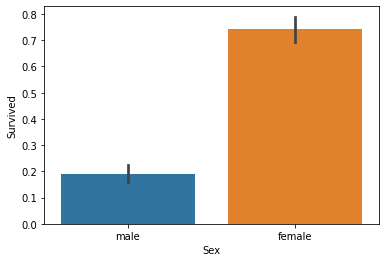

In [8]:
sns.barplot(x='Sex', y='Survived', data=titan_df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

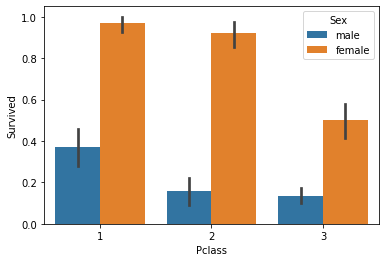

In [9]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titan_df)

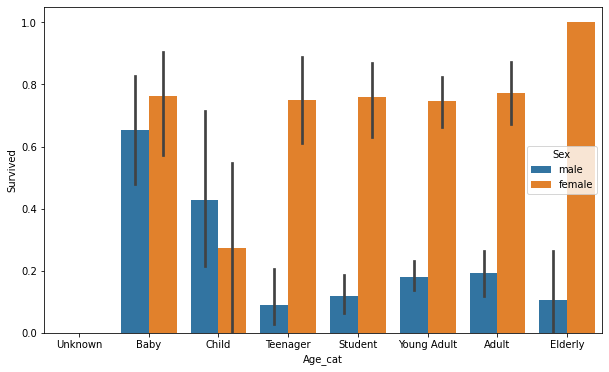

In [10]:
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else: cat = 'Elderly'
        
    return cat

plt.figure(figsize=(10, 6))

group_names = ['Unknown', 'Baby', 'Child', 'Teenager','Student','Young Adult','Adult','Elderly']

titan_df['Age_cat'] = titan_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titan_df, order=group_names)
titan_df.drop('Age_cat', axis=1, inplace=True)

In [11]:
from sklearn.preprocessing import LabelEncoder

def encode_features(dataDF, features):
    for feature in features:
        le = LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF

titan_df = encode_features(titan_df, ['Cabin', 'Sex', 'Embarked'])
titan_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


## Data Preprocessing : Delete. Drop

In [12]:
# drop() : PassengerId, Name, Ticket variables

titan_df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
titan_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,7,3
1,1,1,0,38.0,1,0,71.2833,2,0
2,1,3,0,26.0,0,0,7.9250,7,3
3,1,1,0,35.0,1,0,53.1000,2,3
4,0,3,1,35.0,0,0,8.0500,7,3


In [13]:
# Null
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# drop
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# labelEncoding
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# Data Preprocessing
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [14]:
## 1. Data Loading
titanic_df = pd.read_csv('titanic_train.csv')

# y
y_titanic_df = titanic_df['Survived']
# training dataset
X_titanic_df = titanic_df.drop('Survived', axis=1)

In [15]:
## 2. Data Preprocessing
X_titanic_df = transform_features(X_titanic_df)
X_titanic_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.0,1,0,7.2500,7,3
1,1,0,38.0,1,0,71.2833,2,0
2,3,0,26.0,0,0,7.9250,7,3
3,1,0,35.0,1,0,53.1000,2,3
4,3,1,35.0,0,0,8.0500,7,3


In [16]:
## 3. Data Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df,
                                                   test_size=0.2, random_state=11)

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression # label category
from sklearn.metrics import accuracy_score

# model estimator(object) estimator 객체 생성
# 결정트리, 랜덤포레스트, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
# tree - random_state
dt_clf = DecisionTreeClassifier(random_state=12)
rf_clf = RandomForestClassifier(random_state=12)
lr_clf = LogisticRegression()

# Decision Tree Classifier train/predict/evaluation 
# 결정트리 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('결정트리의 정확도 : {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# Random Forest Classifier train/predict/evaluation
# 랜덤포레스트 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('랜덤포레스트의 정확도 : {0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# Logistic Regression train/predict/evaluation
# 로지스틱회귀 학습/예측/평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('로지스틱회귀의 정확도 : {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

결정트리의 정확도 : 0.8101
랜덤포레스트의 정확도 : 0.8659
로지스틱회귀의 정확도 : 0.8492


C:\Users\Boram Yun\anaconda3\envs\multi\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [18]:
import numpy as np
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV

def exec_kfold(clf, folds=5):
    kfold = KFold(n_splits=folds)
    scores = []
    
    for iter_n, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        # enumerate index 생성 -> 몇 번째 fold
        # enumerate value -> .values[]
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        
        clf.fit(X_train, y_train)
        pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, pred)
        scores.append(accuracy)
        print('교차 검증 %d : %f' %(iter_n, accuracy))
        
    mean_accuracy = np.mean(scores)
    print('평균 정확도 : %f' % mean_accuracy)
    
exec_kfold(dt_clf, folds=5)

교차 검증 0 : 0.748603
교차 검증 1 : 0.769663
교차 검증 2 : 0.792135
교차 검증 3 : 0.764045
교차 검증 4 : 0.808989
평균 정확도 : 0.776687


In [19]:
X_titanic_df.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.0,1,0,7.2500,7,3
1,1,0,38.0,1,0,71.2833,2,0
2,3,0,26.0,0,0,7.9250,7,3


In [20]:
X_titanic_df.values[0]

array([ 3.  ,  1.  , 22.  ,  1.  ,  0.  ,  7.25,  7.  ,  3.  ])

In [21]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5)

for train_index, test_index in kfold.split(X_titanic_df):
    print(train_index, test_index)

[179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196
 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214
 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232
 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250
 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268
 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286
 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304
 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322
 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340
 341 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358
 359 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376
 377 378 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394
 395 396 397 398 399 400 401 402 403 404 405 406 407 408 409 410 411 412
 413 414 415 416 417 418 419 420 421 422 423 424 42

In [22]:
# cross_val_score() - stratified(default)
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5)
for iter_n, accuracy in enumerate(scores):
    print('교차 검증 {0} 정확도 : {1:.4f}'.format(iter_n, accuracy))
    
print('평균 정확도 : {0:.4f}'.format(np.mean(scores)))

교차 검증 0 정확도 : 0.7542
교차 검증 1 정확도 : 0.7809
교차 검증 2 정확도 : 0.7921
교차 검증 3 정확도 : 0.7753
교차 검증 4 정확도 : 0.8146
평균 정확도 : 0.7834


In [23]:
scores

array([0.75418994, 0.78089888, 0.79213483, 0.7752809 , 0.81460674])

In [24]:
# GridSearchCV
# min_samples_split >= 2

from sklearn.model_selection import GridSearchCV

# setting hpyerparameters
parameters = {'max_depth': [2, 3, 5, 10],
            'min_samples_split': [2, 3, 5],
            'min_samples_leaf': [1, 5, 8]}

grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도 : {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도 : 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8715


# Chapter 3. Evaluation

In [25]:
# 학습하지 않고 성별에 따른 생존자 예측 Classifier
import numpy as np
from sklearn.base import BaseEstimator

# BaseEstimator class 상속
class MyDummyClassifier(BaseEstimator):
    def fit(self, X, y=None): # y default None
        pass
    
    def predict(self, X):
        pred = np.zeros((X.shape[0], 1))
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i] == 1:
                pred[i] = 0
            else:
                pred[i] = 1
                
        return pred

In [26]:
# titanic survivors prediction

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Null
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# drop
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# labelEncoding
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# Data Preprocessing
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [27]:
titanic_df = pd.read_csv('titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df,
                                                   test_size=0.2, random_state=11)

myclf = MyDummyClassifier()
myclf.fit(X_train, y_train)
mypred = myclf.predict(X_test)
print('Dummy Classifier의 정확도 : {0:.4f}'.format(accuracy_score(y_test, mypred)))

Dummy Classifier의 정확도 : 0.8324


### MNIST Dataset

In [28]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
    def fit(self, X, y):
        pass
    
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [29]:
digits = load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [30]:
digits.data.shape

(1797, 64)

In [31]:
digits.target.shape

(1797,)

In [32]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [33]:
digits.target == 7

array([False, False, False, ..., False, False, False])

In [34]:
y = (digits.target == 7).astype(int)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=11)

In [36]:
X_train

array([[ 0.,  0.,  3., ..., 12., 14.,  7.],
       [ 0.,  1.,  9., ..., 10.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  1., ..., 16., 13.,  1.],
       [ 0.,  1., 11., ..., 13., 16.,  5.],
       [ 0.,  0.,  6., ...,  6.,  0.,  0.]])

In [37]:
X_test

array([[ 0.,  0.,  7., ...,  3.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  6., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  1., 13., ..., 15.,  3.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ..., 12.,  0.,  0.]])

In [38]:
y_train

array([0, 0, 1, ..., 0, 0, 0])

In [39]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [40]:
y_test.shape

(450,)

In [41]:
# Error : y_test.value_counts()
pd.Series(y_test).value_counts()

0    405
1     45
dtype: int64

In [42]:
fake_cl = MyFakeClassifier()
fake_cl.fit(X_train, y_train)
fakePred = fake_cl.predict(X_test)
accuracy = accuracy_score(y_test, fakePred)
print('예측 정확도 : ', np.round((accuracy), 3))

예측 정확도 :  0.9


In [43]:
from sklearn.metrics import confusion_matrix

# MNIST의 fakePred
confusion_matrix(y_test, fakePred)

#         Predicted
# Actual  [TN | FP]
#         [FN | TP]

array([[405,   0],
       [ 45,   0]], dtype=int64)

In [44]:
# precision, recall

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
    def fit(self, X, y):
        pass
    
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

digits = load_digits()
y = (digits.target == 7).astype(int)
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=11)

fake_clf = MyFakeClassifier()
fake_clf.fit(X_train, y_train)
fakepred = fake_clf.predict(X_test)

In [45]:
fakepred.astype(int).sum()

0

In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# _score(actual, predicted)
print('정밀도 : ', precision_score(y_test, fakepred))
print('재현율 : ', recall_score(y_test, fakepred))

정밀도 :  0.0
재현율 :  0.0


C:\Users\Boram Yun\anaconda3\envs\multi\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    
    print('오차행렬')
    print(confusion)
    print('정확도 : {0:.3f}, 정밀도 : {1:.3f}, 재현율 : {2:.3f}'.format(accuracy, precision, recall))

In [48]:
# titanic_df = pd.read_csv('titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df,
                                                   test_size=0.2, random_state=11)

lr_clf = LogisticRegression()

lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

오차행렬
[[104  14]
 [ 13  48]]
정확도 : 0.849, 정밀도 : 0.774, 재현율 : 0.787


C:\Users\Boram Yun\anaconda3\envs\multi\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [49]:
# lr_clf = LogisticRegression()
# predict_proba(test feature dataset) : 예측 확률 반환

pred_proba = lr_clf.predict_proba(X_test)
pred_proba[:10]  # [0 확률, 1 확률]

array([[0.46175211, 0.53824789],
       [0.87863924, 0.12136076],
       [0.87717092, 0.12282908],
       [0.88269294, 0.11730706],
       [0.85528973, 0.14471027],
       [0.88225767, 0.11774233],
       [0.88838772, 0.11161228],
       [0.20882912, 0.79117088],
       [0.78290779, 0.21709221],
       [0.3693535 , 0.6306465 ]])

In [50]:
pred = lr_clf.predict(X_test)
lr_clf.predict(X_test)

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1], dtype=int64)

In [51]:
# predict_proba, predict concatenate
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1, 1)], axis=1)

print('두 개의 class 중 더 큰 확률 class 값으로 예측')
pred_proba_result

두 개의 class 중 더 큰 확률 class 값으로 예측


array([[0.46175211, 0.53824789, 1.        ],
       [0.87863924, 0.12136076, 0.        ],
       [0.87717092, 0.12282908, 0.        ],
       [0.88269294, 0.11730706, 0.        ],
       [0.85528973, 0.14471027, 0.        ],
       [0.88225767, 0.11774233, 0.        ],
       [0.88838772, 0.11161228, 0.        ],
       [0.20882912, 0.79117088, 1.        ],
       [0.78290779, 0.21709221, 0.        ],
       [0.3693535 , 0.6306465 , 1.        ],
       [0.89982764, 0.10017236, 0.        ],
       [0.87497736, 0.12502264, 0.        ],
       [0.87716489, 0.12283511, 0.        ],
       [0.88834142, 0.11165858, 0.        ],
       [0.43647104, 0.56352896, 1.        ],
       [0.85893504, 0.14106496, 0.        ],
       [0.90373785, 0.09626215, 0.        ],
       [0.73344861, 0.26655139, 0.        ],
       [0.72479025, 0.27520975, 0.        ],
       [0.17179492, 0.82820508, 1.        ],
       [0.75363018, 0.24636982, 0.        ],
       [0.61929346, 0.38070654, 0.        ],
       [0.

In [52]:
from sklearn.preprocessing import Binarizer

X = [[1, -1, 2],
    [2, 0, 0],
    [0, 1.1, 1.2]]

binarizer = Binarizer(threshold=1.1) 
# 임계값 1.1 초과 => 1 (1.1 이하 => 0)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [53]:
from sklearn.preprocessing import Binarizer

# 앞 결과와 동일
c_threshold = 0.5

# Positive 1 class column
pred_proba_1 = pred_proba[:,1].reshape(-1, 1)

bina = Binarizer(threshold=c_threshold).fit(pred_proba_1)
custom_predict = bina.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차행렬
[[104  14]
 [ 13  48]]
정확도 : 0.849, 정밀도 : 0.774, 재현율 : 0.787


In [54]:
# case에 따라 조율
c_threshold = 0.4

# Positive 1 class column
pred_proba_1 = pred_proba[:,1].reshape(-1, 1)

bina = Binarizer(threshold=c_threshold).fit(pred_proba_1)
custom_predict = bina.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차행렬
[[98 20]
 [10 51]]
정확도 : 0.832, 정밀도 : 0.718, 재현율 : 0.836


In [55]:
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값 : ', custom_threshold)
        get_clf_eval(y_test, custom_predict)
        
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

임곗값 :  [[1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1

In [56]:
# precision_recall_curve
from sklearn.metrics import precision_recall_curve

pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print('임곗값 shape : ', thresholds.shape)
print('정밀도 shape : ', precisions.shape)
print('재현율 shape : ', recalls.shape)

idx = np.arange(0, thresholds.shape[0], 15)
print('sample index : ', idx)
print('임곗값 sample : ', np.round(thresholds[idx], 3))
print('정밀도 sample : ', np.round(precisions[idx], 3))
print('재현율 sample : ', np.round(recalls[idx], 3))

임곗값 shape :  (143,)
정밀도 shape :  (144,)
재현율 shape :  (144,)
sample index :  [  0  15  30  45  60  75  90 105 120 135]
임곗값 sample :  [0.104 0.121 0.14  0.186 0.28  0.403 0.564 0.667 0.822 0.947]
정밀도 sample :  [0.389 0.44  0.466 0.539 0.647 0.729 0.836 0.949 0.958 1.   ]
재현율 sample :  [1.    0.967 0.902 0.902 0.902 0.836 0.754 0.607 0.377 0.148]


In [57]:
thresholds

array([0.10394781, 0.10395007, 0.10397544, 0.10773598, 0.10892335,
       0.11161228, 0.11164965, 0.11165858, 0.11203246, 0.11206729,
       0.1162389 , 0.11701687, 0.11730706, 0.11774233, 0.11803438,
       0.12136076, 0.12277408, 0.12282908, 0.12283013, 0.12283511,
       0.1243399 , 0.12502264, 0.12547606, 0.12677781, 0.12841466,
       0.12891671, 0.13068136, 0.13283413, 0.1329989 , 0.13310088,
       0.14030802, 0.14106496, 0.1411124 , 0.14111947, 0.14471027,
       0.14543006, 0.14806859, 0.14806889, 0.14982642, 0.15341146,
       0.15425586, 0.16814009, 0.16850646, 0.18363793, 0.18514805,
       0.1862258 , 0.19696528, 0.19836924, 0.19860132, 0.21709221,
       0.22627228, 0.232227  , 0.23361605, 0.23445307, 0.24013692,
       0.24636982, 0.25042401, 0.26655139, 0.27520975, 0.28008564,
       0.28037989, 0.30448184, 0.30892803, 0.30930873, 0.31660413,
       0.32155052, 0.32179158, 0.34807784, 0.35050439, 0.35074095,
       0.35872277, 0.3803036 , 0.38070654, 0.39929127, 0.40073

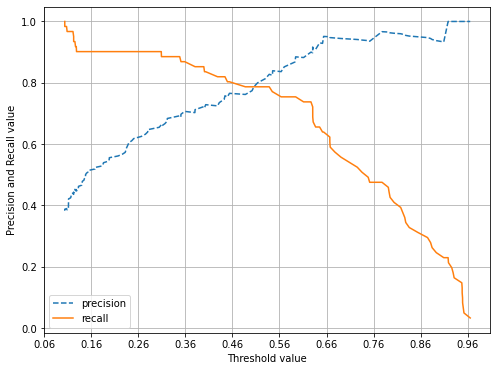

In [58]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    plt.figure(figsize=(8,6))
    thresholds_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:thresholds_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:thresholds_boundary], label='recall')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1])

In [59]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, pred)
print('F1 스코어 : {0:.4f}'.format(f1))

F1 스코어 : 0.7805


In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    
    print('오차행렬')
    print(confusion)
    print('정확도 : {0:.3f}, 정밀도 : {1:.3f}, 재현율 : {2:.3f}, F1 : {3:.4f}'
          .format(accuracy, precision, recall, f1))

In [62]:
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

임곗값 :  [[1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1

In [63]:
from sklearn.metrics import roc_curve

pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)

thr_index = np.arange(1, thresholds.shape[0], 5)

print('샘플 추출을 위한 임곗값 배열의 index :', thr_index)
print('샘플용 임곗값 : ', np.round(thresholds[thr_index], 2))

print('샘플 임곗값별 FPR : ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR : ', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임곗값 배열의 index : [ 1  6 11 16 21 26 31 36 41 46 51]
샘플용 임곗값 :  [0.97 0.65 0.63 0.56 0.45 0.4  0.35 0.15 0.13 0.11 0.11]
샘플 임곗값별 FPR :  [0.    0.017 0.034 0.076 0.127 0.169 0.203 0.466 0.585 0.686 0.797]
샘플 임곗값별 TPR :  [0.033 0.639 0.721 0.754 0.803 0.836 0.885 0.902 0.934 0.967 0.984]


In [64]:
#  thresholds[0] represents no instances being predicted and is arbitrarily set to max(y_score) + 1.
thresholds

array([1.9650902 , 0.9650902 , 0.91817095, 0.90889479, 0.77776787,
       0.75156419, 0.65378607, 0.65147146, 0.6452204 , 0.63679615,
       0.6306465 , 0.6305772 , 0.63056078, 0.62683822, 0.61121278,
       0.59430053, 0.56352896, 0.54554871, 0.54497719, 0.53824789,
       0.48750572, 0.45377068, 0.44943522, 0.44421615, 0.42847831,
       0.40328333, 0.40073604, 0.39929127, 0.3803036 , 0.35872277,
       0.35050439, 0.34807784, 0.30930873, 0.30892803, 0.24013692,
       0.23445307, 0.14806889, 0.14806859, 0.12891671, 0.12841466,
       0.12677781, 0.12547606, 0.12283511, 0.12283013, 0.12277408,
       0.12136076, 0.11206729, 0.11203246, 0.11165858, 0.11161228,
       0.10892335, 0.10773598, 0.10395007, 0.10394781, 0.01160772])

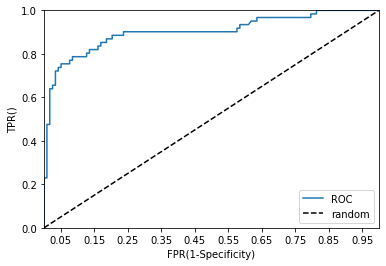

In [65]:
def roc_curve_plot(y_test, pred_proba_c1):
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    
    plt.plot(fprs, tprs, label='ROC')
    
    plt.plot([0, 1], [0, 1], 'k--', label='random')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('FPR(1-Specificity)')
    plt.ylabel('TPR()')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1])

In [68]:
from sklearn.metrics import roc_auc_score

pred_proba = lr_clf.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, pred_proba)
print('ROC AUC 값 : {0:.4f}'.format(roc_score))

ROC AUC 값 : 0.9024


In [69]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    
    print('오차행렬')
    print(confusion)
    print('정확도 : {0:.3f}, 정밀도 : {1:.3f}, 재현율 : {2:.3f}, F1 : {3:.4f}', 'AUC : {4:.4f}'
          .format(accuracy, precision, recall, f1, roc_auc))

In [70]:
def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값 : ', custom_threshold)
        get_clf_eval(y_test, custom_predict, pred_proba_c1)

In [71]:
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

임곗값 :  0.4
오차행렬
[[98 20]
 [10 51]]
정확도 : {0:.3f}, 정밀도 : {1:.3f}, 재현율 : {2:.3f}, F1 : {3:.4f} AUC : 0.9024
임곗값 :  0.45
오차행렬
[[103  15]
 [ 12  49]]
정확도 : {0:.3f}, 정밀도 : {1:.3f}, 재현율 : {2:.3f}, F1 : {3:.4f} AUC : 0.9024
임곗값 :  0.5
오차행렬
[[104  14]
 [ 13  48]]
정확도 : {0:.3f}, 정밀도 : {1:.3f}, 재현율 : {2:.3f}, F1 : {3:.4f} AUC : 0.9024
임곗값 :  0.55
오차행렬
[[109   9]
 [ 15  46]]
정확도 : {0:.3f}, 정밀도 : {1:.3f}, 재현율 : {2:.3f}, F1 : {3:.4f} AUC : 0.9024
임곗값 :  0.6
오차행렬
[[112   6]
 [ 16  45]]
정확도 : {0:.3f}, 정밀도 : {1:.3f}, 재현율 : {2:.3f}, F1 : {3:.4f} AUC : 0.9024
